In [1]:
# pip3 install opencv-python numpy matplotlib
import cv2 as cv
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import os


In [2]:
# Source: https://medium.com/analytics-vidhya/binarization-of-image-using-numpy-65df2b82e189
def read_this(image_file, gray_scale=False):
    image_src = cv.imread(image_file)
    if gray_scale:
        image_src = cv.cvtColor(image_src, cv.COLOR_BGR2GRAY)
    else:
        image_src = cv.cvtColor(image_src, cv.COLOR_BGR2RGB)
    return image_src

In [3]:
def ApplyOtsu(image_file, thresh_val=127, gray_scale=True):
    image_src = read_this(image_file=image_file, gray_scale=gray_scale)
    blur = cv.GaussianBlur(image_src,(5,5),0)
    th, image_b = cv.threshold(image_src, 0, 255, cv.THRESH_BINARY+ cv.THRESH_OTSU)
    return Image.fromarray(image_b)

In [4]:
def save_image(image, old_name, dir):
    if('_binarized' not in old_name):
        index = dir.find('.jpg')
        final_string = dir[:index] + '_binarized' + dir[index:]
        image.save(final_string)
    

def main():
    dir = os.getcwd()
    try:
        #assuming this file is one directory upper than images
        directory = os.fsencode(dir + '/images/')
        for file in os.listdir(directory):
            filename = os.fsdecode(file)
            if filename.endswith(".jpg"):
                image_dir = dir + '/images/' + filename
                binarized_image = ApplyOtsu(image_file=image_dir)
                save_image(binarized_image, filename, image_dir)
            else:
                continue
                
    except Exception as e:
        print(e)

if __name__ == "__main__":
    main()  

In [5]:
import cv2
import numpy as np
#identify paragraps
# Load image, grayscale, Gaussian blur, Otsu's threshold
image = cv2.imread('./images/fmb-cb-55-075r_binarized.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7,7), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Create rectangular structuring element and dilate
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
dilate = cv2.dilate(thresh, kernel, iterations=4)

# Find contours and draw rectangle
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

cropped = [];
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cropped.append(image[y:y+h, x:x+w])
    cv2.rectangle(image, (x, y), (x + w, y + h), (30,200,10), 2)

#cv2.imshow('thresh', thresh)
#cv2.imshow('dilate', dilate)
cv2.imshow('image', image)
i = 0
for k in cropped:
    cv2.imwrite('cropped_image' + str(i) +'.png', k)
    i= i+1
cv2.waitKey()

-1

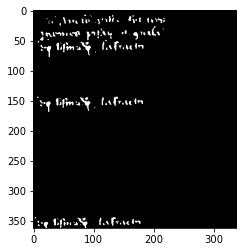

In [55]:
image1 = cv2.imread("cropped_image2.png")
#plt.imshow(image1)
#grayImage= cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
#plt.imshow(grayImage)
GaussianFilter= cv2.GaussianBlur(grayImage, (5,5), 0)
_, binarizedImage = cv2.threshold(GaussianFilter, 127, 255, cv2.THRESH_BINARY)
plt.figure()
plt.imshow(binarizedImage, cmap='Greys_r')
height, width= binarizedImage.shape

for i in range(height):
    for j in range(width):
        # img[i, j] is the RGB pixel at position (i, j)
        # check if it's [0, 0, 0] and replace with [255, 255, 255] if so
        if binarizedImage[i, j] == 0:
            binarizedImage[i, j] =255
        else:
            binarizedImage[i, j] = 0
plt.imshow(binarizedImage, cmap='Greys_r')          

[0, 0, 0, 0, 0, 0, 0, 0, 1020, 2040, 2550, 1275, 2295, 3825, 7140, 9945, 12495, 11985, 10710, 10455, 7140, 4590, 2040, 765, 510, 255, 0, 510, 765, 255, 255, 1530, 765, 1020, 1785, 3570, 10200, 17340, 21165, 19125, 18105, 15300, 8670, 4080, 3060, 2550, 2805, 2550, 2805, 2040, 1275, 510, 1275, 4080, 6120, 6120, 5865, 5610, 8160, 12495, 14535, 17340, 17340, 14790, 12750, 11220, 4845, 2805, 1785, 1785, 1275, 1020, 765, 1020, 1020, 510, 510, 510, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1275, 4080, 6120, 6120, 5865, 5610, 8160, 12495, 14535, 17340, 17340, 14790, 12750, 11220, 4845, 2805, 1785, 1785, 1275, 1020, 765, 1020, 1020, 510, 510, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

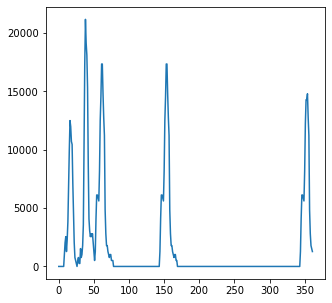

In [106]:
img_row_sum = np.sum(binarizedImage,axis=1).tolist()
print(img_row_sum)
plt.figure(figsize=(5,5))
plt.plot(img_row_sum)
plt.show()


In [110]:
from scipy.signal import find_peaks
x =img_row_sum
peaks, _ = find_peaks(x, distance=20)
print(peaks)


[ 16  38  61 153 354]


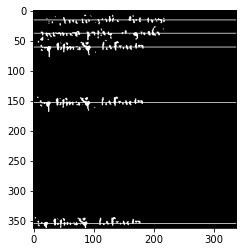

In [113]:

newImage = binarizedImage.copy()
height, width= newImage.shape
for i in range(height):
    if(i in peaks):
        for j in range(width):
            newImage[i,j] = 255
plt.imshow(newImage, cmap='Greys_r')     
        

In [74]:
from scipy.signal import argrelextrema
data = np.array(img_row_sum)

maximums = argrelextrema(data, np.greater, order =2)

print(maximums)


(array([ 10,  16,  28,  31,  38, 354], dtype=int64),)


In [45]:
height, width = binarizedImage.shape
print('width : ', width)
print('height : ', height)
horizontal_projection = np.sum(binarizedImage, axis=1);
print(horizontal_projection)

width :  338
height :  362
[338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338
 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338
 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338
 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338
 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338
 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338
 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338
 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338
 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338
 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338
 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338
 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338
 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338 338
 338 338 338 338 338 338

[[86190 86190 86190]
 [86190 86190 86190]
 [86190 86190 86190]
 ...
 [83014 83014 83014]
 [83477 83477 83477]
 [83442 83442 83442]]
(362, 338, 3)


TypeError: only size-1 arrays can be converted to Python scalars

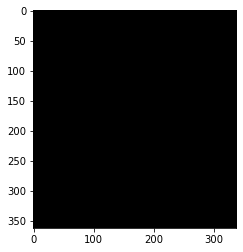

In [42]:
horizontal_projection = np.sum(image1, axis=1)
print(horizontal_projection)
print(image1.shape)
blankImage = np.zeros((height, width, 3), np.uint8)
plt.figure()
plt.imshow(blankImage, cmap='Greys_r')
for row in range(height):
    cv2.line(blankImage, (0,row), (int(horizontal_projection[row]*width/height),row), (255,255,255), 1)

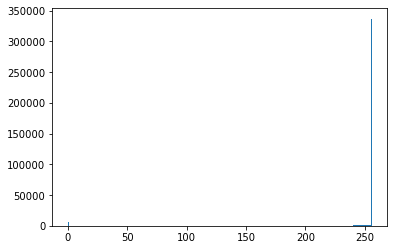

In [47]:
plt.hist(image1.ravel(), 256, [0,256])
plt.show()

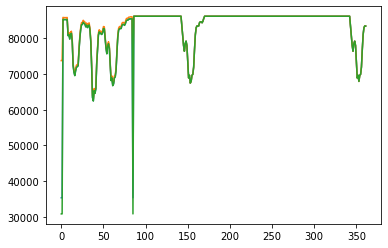

In [12]:
img_row_sum = np.sum(image1,axis=1).tolist()

plt.plot(img_row_sum)
plt.show()

In [ ]:
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import time

THRESHOLD = 200
TABLE = [1]*THRESHOLD + [0]*(256-THRESHOLD)

def line_split(image, table=TABLE, split_threshold=4):

    if not isinstance(image, Image.Image):
        if isinstance(image, np.ndarray):
            image = Image.fromarray(image)
        else:
            raise TypeError

    image_ = image.convert('L')
    bn = image_.point(table, '1')

    bn_mat = np.array(bn)
    h, pic_len = bn_mat.shape


    bn_mat_diff = np.diff(bn_mat)
    project = np.sum(bn_mat_diff, 1) 
    pos = np.where(project <= split_threshold)[0]  
    project[pos] = 0
    transformed=np.fft.fft(project)
    itransformed_real = np.real(np.fft.ifft(transformed))
    signal = np.around(itransformed_real)
    pos = np.where(signal <= 0)[0]

    diff = np.diff(pos)

    coordinate = list(zip(pos[:-1], pos[1:]))
    info = list(zip(diff, coordinate))
    info = list(filter(lambda x: x[0] > 10, info))
    line_res = []
    for pos_info in info:
        width = pos_info[0]
        x1, y1, x2, y2 = 0, pos_info[1][0]-int(0.1*width), pic_len, pos_info[1][1]+int(0.1*width)
        sub = image.crop((x1, y1, x2, y2))
        line_res.append([np.array(sub), (x1, y1, x2, y2)])
    return line_res



img = cv2.imread('cropped_image4.png')
t1 = time.time()
line_imgs = line_split(img)
t2 = time.time()
print("Cost time: {}".format(t2-t1))
tmp = 0
for line_img in line_imgs:
    cv2.imwrite('./debug/'+str(tmp)+'.jpg',line_img[0])
    tmp += 1
    start = line_img[1][0],line_img[1][3]
    end = line_img[1][2],line_img[1][3]
    cv2.line(img,start,end,(0,0,255),1)
cv2.imwrite('line_split_result.jpg',img)

In [ ]:
plt.imshow(img)

In [ ]:
dst = cv2.GaussianBlur(img,(9,9),cv2.BORDER_DEFAULT)
 
# display input and output image
cv2.imshow("Gaussian Smoothing",np.hstack((img, dst)))
cv2.waitKey(0) # waits until a key is pressed

In [ ]:
plt.hist(img)